In [26]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set()
from sklearn import metrics, preprocessing, tree
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn import datasets, linear_model
from matplotlib import pyplot
%matplotlib inline
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import IsolationForest

In [27]:
data = pd.read_csv('downloads/houses_to_rent_v3.csv')
df = data

df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


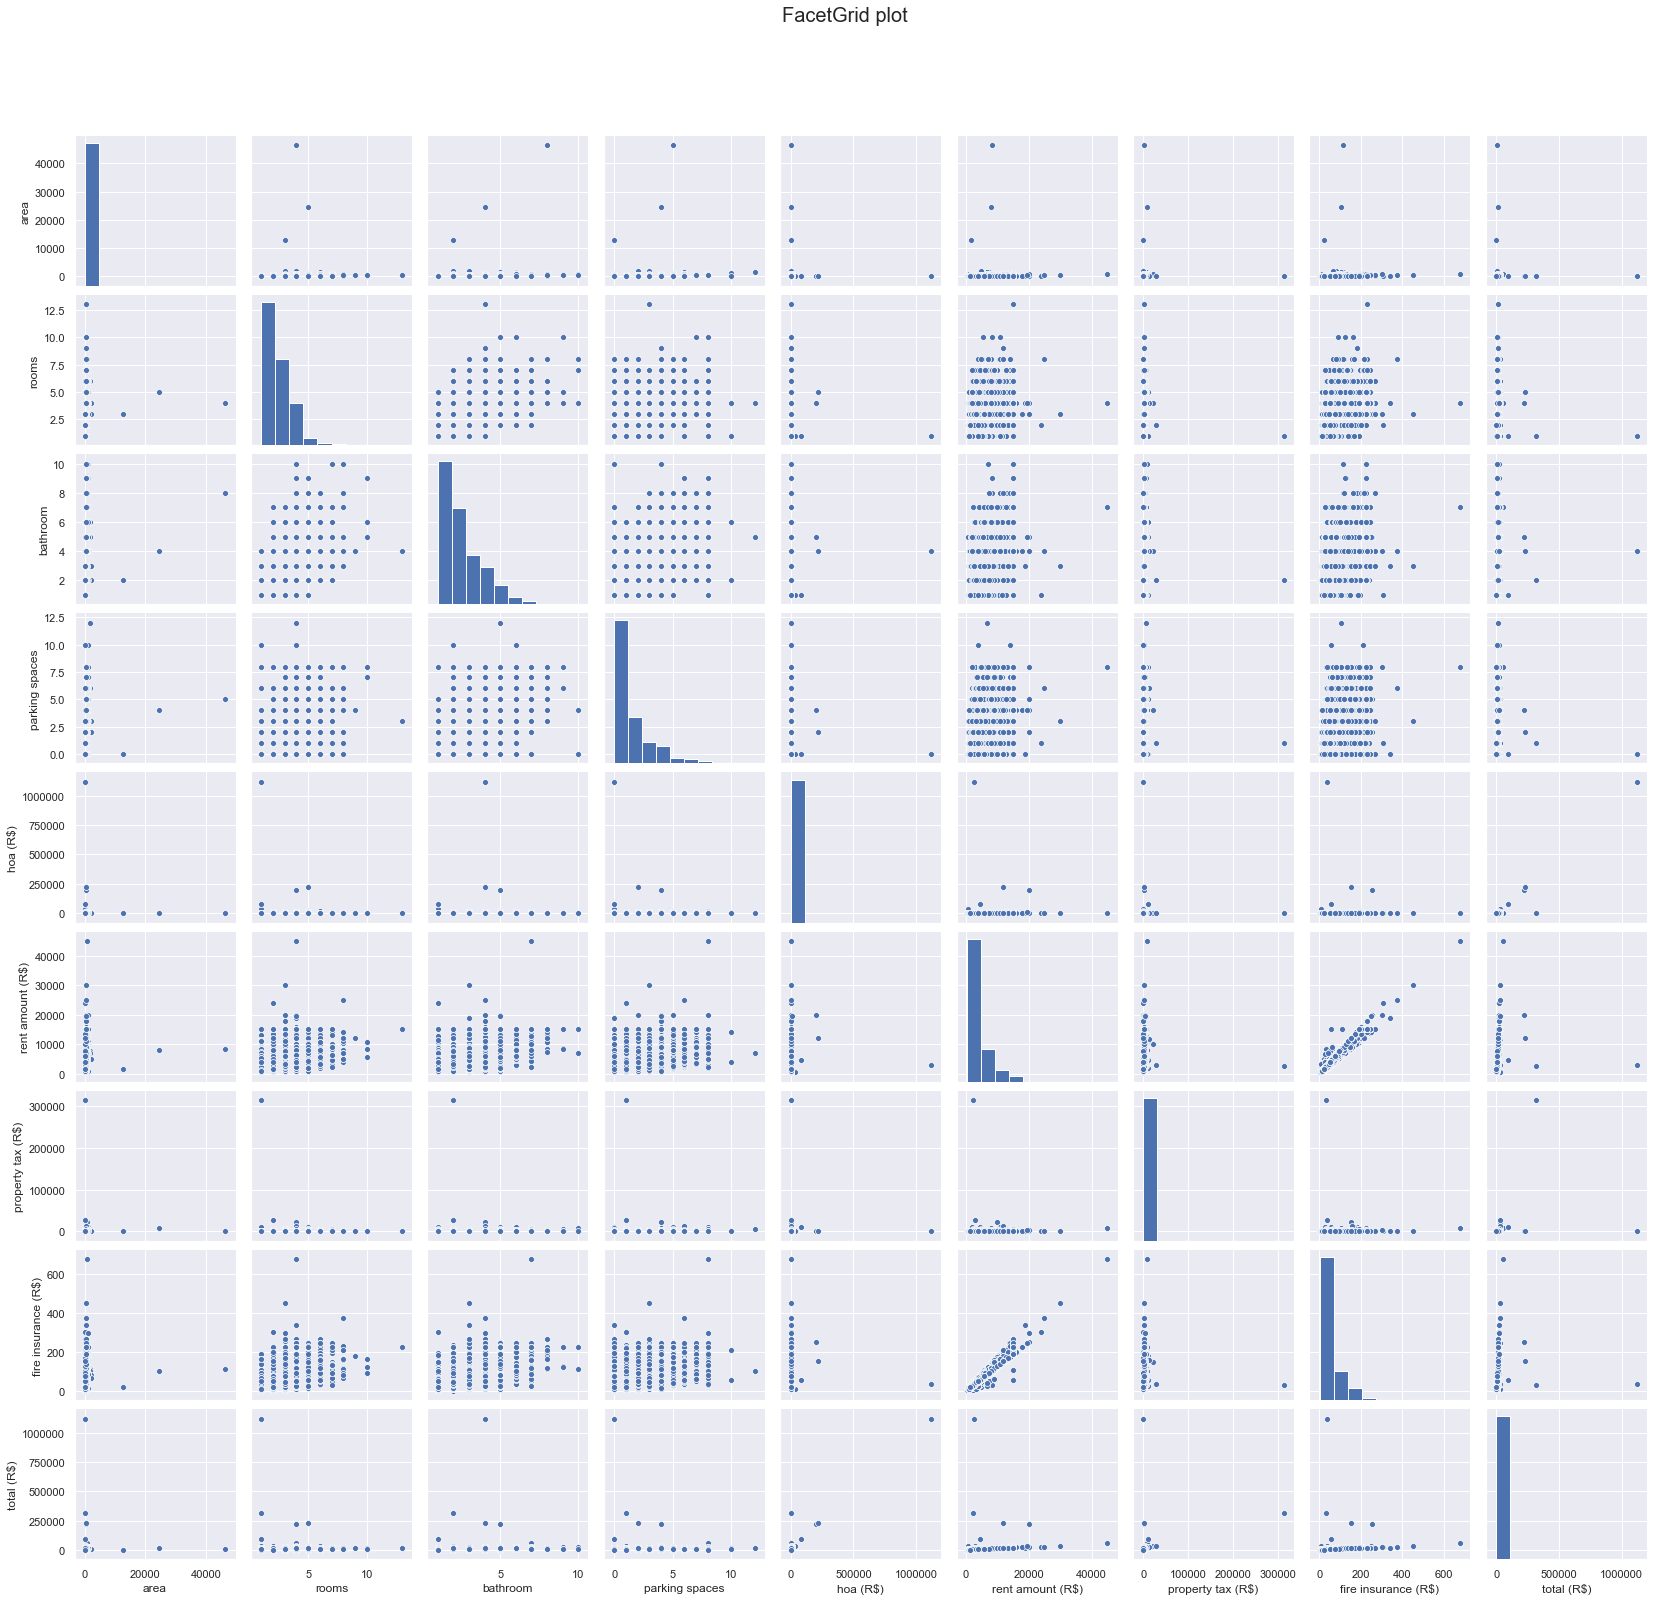

In [28]:
g = sns.pairplot(df)
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9)

In [29]:

new_data = pd.DataFrame(df, columns=['area', 'total (R$)'])

[6.0, 4.0]


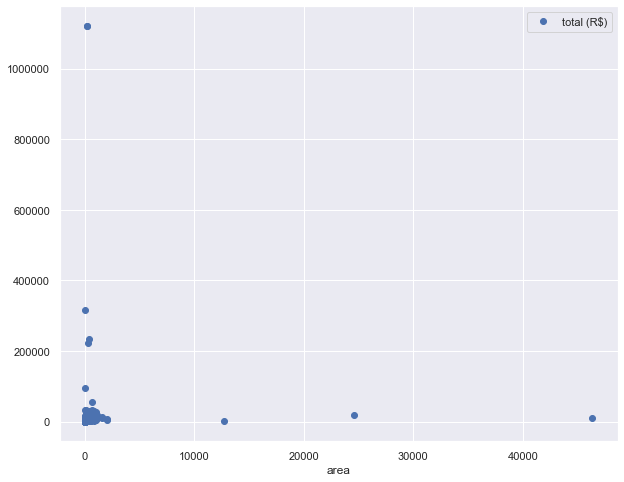

In [30]:
print(plt.rcParams.get('figure.figsize'))

fig_size = plt.rcParams['figure.figsize']

fig_size[0] = 10

fig_size[1] = 8

plt.rcParams['figure.figsize'] = fig_size

new_data.plot(x='area', y='total (R$)', style='o')

In [31]:
iso_forest = IsolationForest(n_estimators=300, contamination=0.10)

iso_forest = iso_forest.fit(new_data)

In [32]:
isof_outliers = iso_forest.predict(new_data)

In [33]:
isoF_outliers_values = new_data[iso_forest.predict(new_data) == -1]

In [34]:
isoF = isoF_outliers_values.index.values.tolist()

In [35]:
X = new_data.drop(['total (R$)'], axis=1)

y = new_data[['total (R$)']]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)

regressor.fit(X_train, y_train.values.ravel())

y_pred = regressor.predict(X_test)

In [38]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 2611.1738708448047
Mean Squared Error: 89094520.8391644
Root Mean Squared Error 9438.989397131687


In [39]:
X_train.drop(X_train.index[isoF])

IndexError: index 8560 is out of bounds for axis 0 with size 8553

In [21]:
X_train = X_train.drop(isoF_outliers_values.index.values.tolist(), axis = 0)

#y_train = y_train.drop(isoF_outliers_values.index.values.tolist())

KeyError: '[  148   176   230   257   265   320   369   415   558   628   671   722\n   915   974  1041  1098  1126  1213  1255  1297  1334  1437  1467  1478\n  1516  1743  1766  1829  1845  1870  1892  1893  1915  1946  2007  2049\n  2055  2087  2103  2175  2182  2250  2290  2315  2376  2395  2397  2431\n  2446  2454  2456  2475  2495  2511  2520  2521  2576  2617  2623  2627\n  2706  2778  2831  2846  3017  3099  3100  3120  3152  3304  3320  3485\n  3518  3524  3716  3848  3889  3953  3977  4008  4025  4060  4153  4170\n  4290  4368  4390  4402  4414  4558  4624  4771  4799  4807  4959  4965\n  5002  5035  5118  5120  5189  5274  5341  5365  5367  5528  5579  5611\n  5617  5670  5742  5877  5886  5915  5916  5931  5949  5982  6014  6020\n  6123  6152  6220  6374  6397  6477  6510  6579  6606  6645  6700  6726\n  6757  6778  6829  6837  7006  7049  7071  7095  7135  7169  7192  7212\n  7285  7324  7370  7433  7449  7538  7553  7583  7597  7606  7645  7667\n  7707  7710  7822  7947  7968  8057  8098  8127  8148  8189  8194  8196\n  8263  8278  8282  8306  8327  8374  8463  8506  8563  8628  8680  8682\n  8745  8858  8896  8957  9012  9021  9229  9241  9257  9270  9278  9287\n  9320  9363  9368  9388  9452  9459  9518  9520  9562  9656  9658  9820\n  9857  9862  9870  9914  9997 10062 10077 10092 10172 10190 10243 10380\n 10426 10472 10587 10633 10686 10688] not found in axis'

In [16]:
isoF_outliers_values.index.values.tolist()

[8,
 19,
 37,
 40,
 86,
 105,
 106,
 131,
 143,
 148,
 157,
 176,
 180,
 202,
 219,
 230,
 236,
 241,
 254,
 255,
 257,
 263,
 265,
 267,
 270,
 297,
 300,
 306,
 317,
 320,
 322,
 330,
 337,
 338,
 354,
 367,
 369,
 375,
 408,
 412,
 415,
 420,
 421,
 423,
 428,
 456,
 463,
 472,
 490,
 493,
 502,
 510,
 534,
 538,
 540,
 545,
 546,
 547,
 558,
 566,
 570,
 571,
 575,
 581,
 584,
 591,
 592,
 595,
 602,
 607,
 608,
 615,
 626,
 628,
 638,
 640,
 650,
 652,
 654,
 661,
 669,
 671,
 679,
 681,
 684,
 686,
 699,
 711,
 718,
 719,
 722,
 753,
 769,
 770,
 777,
 800,
 816,
 831,
 838,
 848,
 867,
 889,
 911,
 915,
 923,
 939,
 944,
 967,
 974,
 978,
 980,
 990,
 995,
 1020,
 1034,
 1041,
 1048,
 1056,
 1058,
 1072,
 1081,
 1098,
 1099,
 1107,
 1114,
 1126,
 1138,
 1183,
 1190,
 1200,
 1206,
 1207,
 1208,
 1213,
 1222,
 1250,
 1253,
 1255,
 1262,
 1276,
 1280,
 1285,
 1297,
 1303,
 1332,
 1334,
 1369,
 1381,
 1392,
 1410,
 1412,
 1437,
 1444,
 1446,
 1449,
 1452,
 1465,
 1467,
 1470,
 1478,

In [ ]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)

regressor.fit(X_train, y_train.values.ravel())

y_pred = regressor.predict(X_test)

print('Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Text(0.5, 1.0, 'Residual plot')

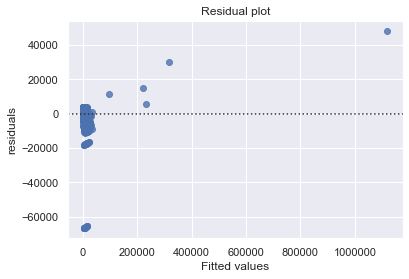

In [10]:
predictions = forest_grid.predict(x_train)
y_trainresiduals = y_train.reshape(-1)
residuals = y_trainresiduals - predictions
residuals
y_trainresiduals
sns.residplot(y_trainresiduals, residuals)
        

plt.ylabel('residuals')
plt.xlabel("Fitted values")
plt.title('Residual plot')


In [ ]:
import sklearn.metrics.roc_auc_score